In [967]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-storm-20/DataStorm2.0_Q1-v2.pdf
/kaggle/input/data-storm-20/Hotel-A-test.csv
/kaggle/input/data-storm-20/Hotel-A-train.csv
/kaggle/input/data-storm-20/Hotel-A-validation.csv
/kaggle/input/data-storm-20/Hotel-A-data-dictionary.csv


In [968]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [969]:
train = pd.read_csv('/kaggle/input/data-storm-20/Hotel-A-train.csv')
test = pd.read_csv('/kaggle/input/data-storm-20/Hotel-A-test.csv')
val = pd.read_csv('/kaggle/input/data-storm-20/Hotel-A-validation.csv')
data_dict = pd.read_csv('/kaggle/input/data-storm-20/Hotel-A-data-dictionary.csv')

In [970]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27499 entries, 0 to 27498
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Reservation-id          27499 non-null  int64 
 1   Gender                  27499 non-null  object
 2   Age                     27499 non-null  int64 
 3   Ethnicity               27499 non-null  object
 4   Educational_Level       27499 non-null  object
 5   Income                  27499 non-null  object
 6   Country_region          27499 non-null  object
 7   Hotel_Type              27499 non-null  object
 8   Expected_checkin        27499 non-null  object
 9   Expected_checkout       27499 non-null  object
 10  Booking_date            27499 non-null  object
 11  Adults                  27499 non-null  int64 
 12  Children                27499 non-null  int64 
 13  Babies                  27499 non-null  int64 
 14  Meal_Type               27499 non-null  object
 15  Vi

In [971]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4318 entries, 0 to 4317
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Reservation-id          4318 non-null   int64 
 1   Gender                  4318 non-null   object
 2   Age                     4318 non-null   int64 
 3   Ethnicity               4318 non-null   object
 4   Educational_Level       4318 non-null   object
 5   Income                  4318 non-null   object
 6   Country_region          4318 non-null   object
 7   Hotel_Type              4318 non-null   object
 8   Expected_checkin        4318 non-null   object
 9   Expected_checkout       4318 non-null   object
 10  Booking_date            4318 non-null   object
 11  Adults                  4318 non-null   int64 
 12  Children                4318 non-null   int64 
 13  Babies                  4318 non-null   int64 
 14  Meal_Type               4318 non-null   object
 15  Vist

In [972]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2749 entries, 0 to 2748
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Reservation-id          2749 non-null   int64 
 1   Gender                  2749 non-null   object
 2   Age                     2749 non-null   int64 
 3   Ethnicity               2749 non-null   object
 4   Educational_Level       2749 non-null   object
 5   Income                  2749 non-null   object
 6   Country_region          2749 non-null   object
 7   Hotel_Type              2749 non-null   object
 8   Expected_checkin        2749 non-null   object
 9   Expected_checkout       2749 non-null   object
 10  Booking_date            2749 non-null   object
 11  Adults                  2749 non-null   int64 
 12  Children                2749 non-null   int64 
 13  Babies                  2749 non-null   int64 
 14  Meal_Type               2749 non-null   object
 15  Vist

In [973]:
data = train.append(val, ignore_index=True)

In [974]:
data_dict.style.set_properties(subset=['Description'], **{'width': '900px'})

,Data Field,Description
0,Reservation-id,A unique booking id
1,Gender,Gender of the reservation person
2,Age,Age of the reservation person. Age is varying from 18 -- 70
3,Ethnicity,"Ethnicity of the reservation person. This field takes one of the following ethnicities: Latino, African American, Asian American and Caucasian"
4,Educational_Level,"Educational level of the reservation person. This field takes one of the following educational level; Mid-School, High-School, College and Grad"
5,Income,"Income of the reservation person. This field takes one of the following: <25K, 25K – 50K,50K – 100K and >100K"
6,Country_region,"Country region of the reservation person. This field takes one of the following: North, South, East and West"
7,Hotel_Type,"Hotel type of the reservation; i.e City Hotels, Airport Hotels and Resorts"
8,Expected_checkin,Expected check-in date
9,Expected_checkout,Expected checkout date


In [975]:
pd.set_option('display.max_columns', None)

In [976]:
data.head()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,Booking_date,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,39428300,F,40,Latino,Grad,<25K,North,City Hotel,7/1/2015,7/2/2015,5/21/2015,2,2,0,BB,No,No,No Deposit,Online,Yes,Check-In,Yes,10,218
1,77491756,F,49,Latino,Mid-School,50K -- 100K,East,City Hotel,7/1/2015,7/2/2015,5/26/2015,3,3,0,BB,No,No,Refundable,Online,Yes,Check-In,No,0,185
2,73747291,F,42,caucasian,Grad,<25K,East,City Hotel,7/2/2015,7/6/2015,6/29/2015,3,3,0,BB,No,No,No Deposit,Online,Yes,Check-In,No,0,119
3,67301739,M,25,African American,College,>100K,South,Airport Hotels,7/2/2015,7/3/2015,6/20/2015,4,3,0,BB,No,No,Refundable,Agent,Yes,Check-In,Yes,5,144
4,77222321,F,62,Latino,High-School,25K --50K,East,Resort,7/3/2015,7/4/2015,6/20/2015,1,1,0,BB,No,No,No Deposit,Direct,No,Check-In,Yes,10,242


In [977]:
data['Reservation_Status'].value_counts()

Check-In    22850
Canceled     4875
No-Show      2523
Name: Reservation_Status, dtype: int64

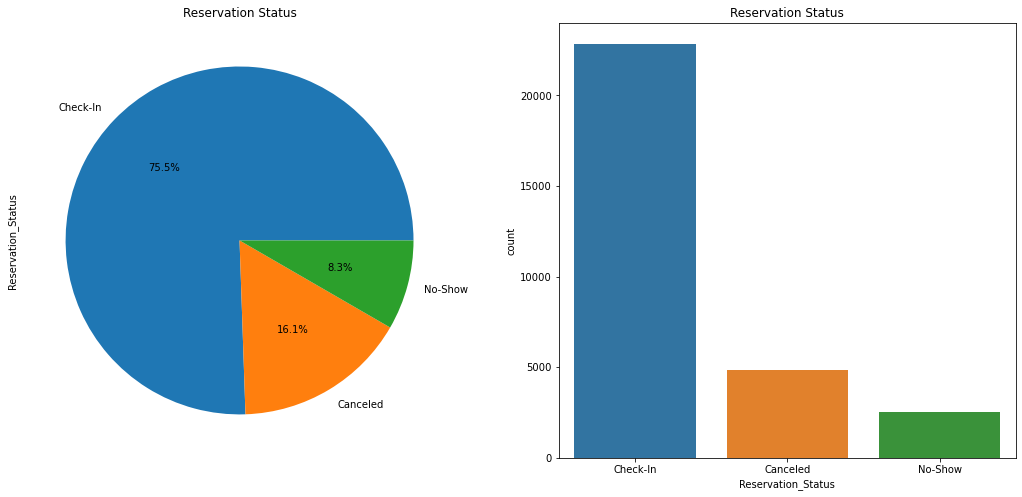

In [978]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
data['Reservation_Status'].value_counts().plot.pie(explode=None,autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Reservation Status')
sns.countplot('Reservation_Status',data=data,ax=ax[1])
ax[1].set_title('Reservation Status')
plt.show()

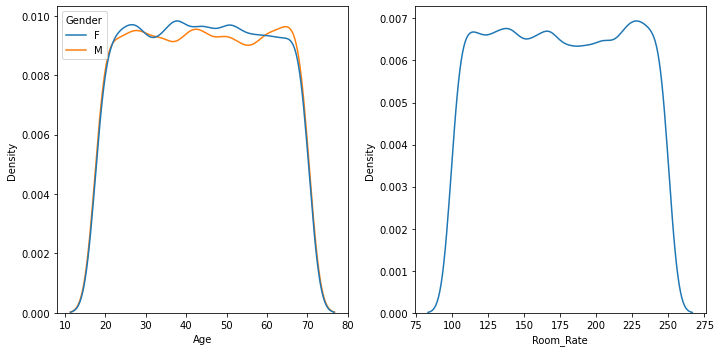

In [979]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5), sharey=False)

sns.kdeplot(data=data, x="Age", hue="Gender", ax=ax1)
sns.kdeplot(data=data, x="Room_Rate", ax=ax2)
plt.tight_layout()
plt.show()

In [980]:
data['Hotel_Type'].value_counts()

Airport Hotels    10234
City Hotel        10035
Resort             9979
Name: Hotel_Type, dtype: int64

In [981]:
def check_unique(df):
    col_lst = ['Gender', 'Ethnicity', 'Educational_Level', 'Country_region', 'Hotel_Type', 'Meal_Type',
          'Visted_Previously', 'Previous_Cancellations', 'Deposit_type', 'Booking_channel', 
          'Required_Car_Parking', 'Use_Promotion']
    for i in col_lst:
        print(data[i].unique().tolist())
        
check_unique(data)

['F', 'M']
['Latino', 'caucasian', 'African American', 'Asian American']
['Grad', 'Mid-School', 'College', 'High-School']
['North', 'East', 'South', 'West']
['City Hotel', 'Airport Hotels', 'Resort']
['BB', 'FB', 'HB']
['No', 'Yes']
['No', 'Yes']
['No Deposit', 'Refundable', 'Non-Refundable']
['Online', 'Agent', 'Direct']
['Yes', 'No']
['Yes', 'No']


In [982]:
data['Reservation_Status'].unique().tolist()

['Check-In', 'Canceled', 'No-Show']

In [983]:
check_unique(test)

['F', 'M']
['Latino', 'caucasian', 'African American', 'Asian American']
['Grad', 'Mid-School', 'College', 'High-School']
['North', 'East', 'South', 'West']
['City Hotel', 'Airport Hotels', 'Resort']
['BB', 'FB', 'HB']
['No', 'Yes']
['No', 'Yes']
['No Deposit', 'Refundable', 'Non-Refundable']
['Online', 'Agent', 'Direct']
['Yes', 'No']
['Yes', 'No']


In [984]:
data = data.drop_duplicates(subset="Reservation-id", keep="last")

In [985]:
test = test.drop_duplicates(subset="Reservation-id", keep="last")

In [986]:
data[['Expected_checkin','Expected_checkout']] = data[['Expected_checkin','Expected_checkout']].apply(pd.to_datetime) 
data['Number_Of_Days'] = (data['Expected_checkout'] - data['Expected_checkin']).dt.days

In [987]:
data['Checkin_month'] = data['Expected_checkin'].dt.month
data['Checkout_month'] = data['Expected_checkout'].dt.month

data['Booking_month'] = pd.to_datetime(data['Booking_date']).dt.month

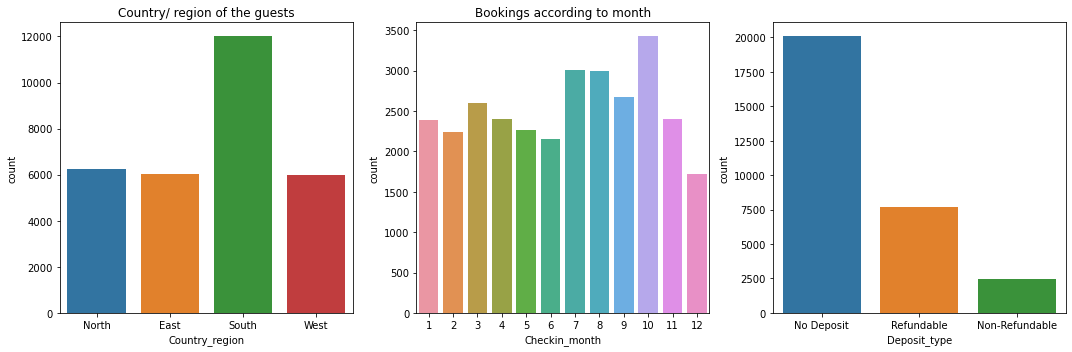

In [988]:
fig,ax=plt.subplots(1,3,figsize=(15,5))

sns.countplot('Country_region',data=data,ax=ax[0])
ax[0].set_title('Country/ region of the guests')

sns.countplot('Checkin_month',data=data,ax=ax[1])
ax[1].set_title('Bookings according to month')

sns.countplot('Deposit_type',data=data,ax=ax[2])
ax[0].set_title('Country/ region of the guests')

plt.tight_layout()

plt.show()

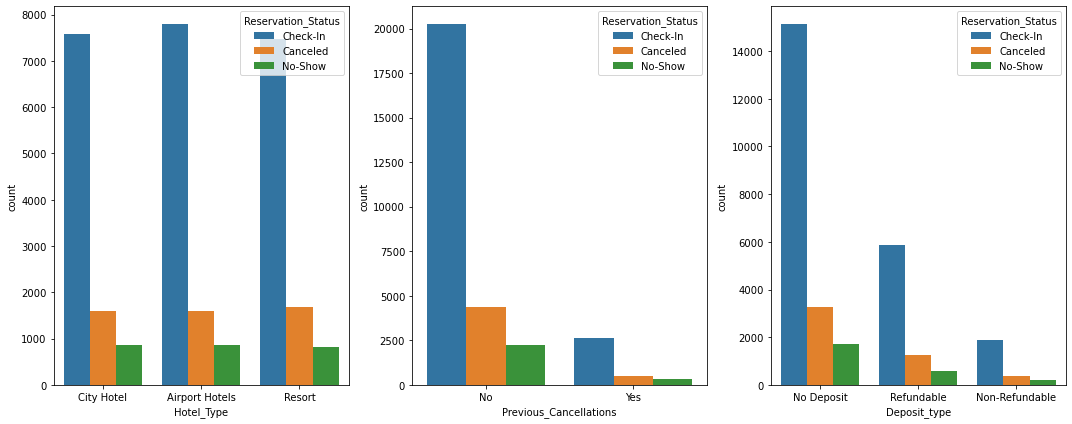

In [989]:
fig,ax=plt.subplots(1,3,figsize=(15,6))

sns.countplot(x='Hotel_Type',hue='Reservation_Status',data=data, ax=ax[0])
sns.countplot(x='Previous_Cancellations',hue='Reservation_Status',data=data, ax=ax[1])
sns.countplot(x='Deposit_type',hue='Reservation_Status',data=data, ax=ax[2])

plt.tight_layout()

plt.show()

In [990]:
data['Reservation_Status'].replace(to_replace=['Check-In', 'Canceled', 'No-Show'], 
                                   value=[1, 2, 3], inplace=True)

In [991]:
def cat_coding(df):
    col_lst = ['Gender', 'Ethnicity', 'Educational_Level', 'Income', 'Country_region', 'Hotel_Type', 
               'Meal_Type', 'Visted_Previously', 'Previous_Cancellations', 'Deposit_type', 
               'Booking_channel', 'Required_Car_Parking', 'Use_Promotion']
    for i in col_lst:
        df[i] = df[i].astype('category').cat.codes

cat_coding(data)
cat_coding(test)

In [992]:
data.head()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,Booking_date,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate,Number_Of_Days,Checkin_month,Checkout_month,Booking_month
0,39428300,0,40,2,1,2,1,1,2015-07-01,2015-07-02,5/21/2015,2,2,0,0,0,0,0,2,1,1,1,10,218,1,7,7,5
1,77491756,0,49,2,3,1,0,1,2015-07-01,2015-07-02,5/26/2015,3,3,0,0,0,0,2,2,1,1,0,0,185,1,7,7,5
2,73747291,0,42,3,1,2,0,1,2015-07-02,2015-07-06,6/29/2015,3,3,0,0,0,0,0,2,1,1,0,0,119,4,7,7,6
3,67301739,1,25,0,0,3,2,0,2015-07-02,2015-07-03,6/20/2015,4,3,0,0,0,0,2,0,1,1,1,5,144,1,7,7,6
4,77222321,0,62,2,2,0,0,2,2015-07-03,2015-07-04,6/20/2015,1,1,0,0,0,0,0,1,0,1,1,10,242,1,7,7,6


In [993]:
test[['Expected_checkin','Expected_checkout']] = test[['Expected_checkin','Expected_checkout']].apply(pd.to_datetime) 
test['Number_Of_Days'] = (test['Expected_checkout'] - test['Expected_checkin']).dt.days

In [994]:
test['Checkin_month'] = test['Expected_checkin'].dt.month
test['Checkout_month'] = test['Expected_checkout'].dt.month

test['Booking_month'] = pd.to_datetime(test['Booking_date']).dt.month

In [995]:
print('Oldest customer was of:',data['Age'].max(),'Years')
print('Youngest customer was of:',data['Age'].min(),'Years')

Oldest customer was of: 70 Years
Youngest customer was of: 18 Years


In [996]:
data['Age_band'] = 0
data.loc[data['Age']<=25,'Age_band'] = 0
data.loc[(data['Age']>25)&(data['Age']<=40),'Age_band'] = 1
data.loc[(data['Age']>40)&(data['Age']<= 60),'Age_band'] = 2
data.loc[data['Age']> 60, 'Age_band'] = 3

In [997]:
test['Age_band'] = 0
test.loc[test['Age']<=25,'Age_band'] = 0
test.loc[(test['Age']>25)&(test['Age']<=40),'Age_band'] = 1
test.loc[(test['Age']>40)&(test['Age']<= 60),'Age_band'] = 2
test.loc[test['Age']> 60, 'Age_band'] = 3

In [998]:
print('Minimum room rate is:',data['Room_Rate'].min())
print('Maximum room rate is:',data['Room_Rate'].max())

Minimum room rate is: 100
Maximum room rate is: 250


In [999]:
data['Room_Rate_bands'] = 0
data.loc[(data['Room_Rate']>=50)&(data['Room_Rate']<150),'Room_Rate_bands'] = 0
data.loc[(data['Room_Rate']>=150)&(data['Room_Rate']<200),'Room_Rate_bands'] = 1
data.loc[(data['Room_Rate']>=200)&(data['Room_Rate']<250),'Room_Rate_bands'] = 2
data.loc[(data['Room_Rate']>250), 'Room_Rate_bands'] = 3

In [1000]:
test['Room_Rate_bands'] = 0
test.loc[(test['Room_Rate']>=50)&(test['Room_Rate']<150),'Room_Rate_bands'] = 0
test.loc[(test['Room_Rate']>=150)&(test['Room_Rate']<200),'Room_Rate_bands'] = 1
test.loc[(test['Room_Rate']>=200)&(test['Room_Rate']<250),'Room_Rate_bands'] = 2
test.loc[(test['Room_Rate']>250), 'Room_Rate_bands'] = 3

In [1001]:
data = data[['Reservation-id', 'Gender', 'Age_band', 'Ethnicity', 'Educational_Level', 'Income',
            'Country_region', 'Hotel_Type', 'Booking_month', 'Checkin_month', 'Checkout_month',
            'Number_Of_Days', 'Adults', 'Children', 'Babies', 'Meal_Type', 'Visted_Previously',
            'Previous_Cancellations', 'Deposit_type', 'Booking_channel', 'Required_Car_Parking',
            'Reservation_Status', 'Use_Promotion', 'Discount_Rate', 'Room_Rate_bands']]

In [1002]:
data.head()

,Reservation-id,Gender,Age_band,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Booking_month,Checkin_month,Checkout_month,Number_Of_Days,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate_bands
0,39428300,0,1,2,1,2,1,1,5,7,7,1,2,2,0,0,0,0,0,2,1,1,1,10,2
1,77491756,0,2,2,3,1,0,1,5,7,7,1,3,3,0,0,0,0,2,2,1,1,0,0,1
2,73747291,0,2,3,1,2,0,1,6,7,7,4,3,3,0,0,0,0,0,2,1,1,0,0,0
3,67301739,1,0,0,0,3,2,0,6,7,7,1,4,3,0,0,0,0,2,0,1,1,1,5,0
4,77222321,0,3,2,2,0,0,2,6,7,7,1,1,1,0,0,0,0,0,1,0,1,1,10,2


In [1003]:
test = test[['Reservation-id', 'Gender', 'Age_band', 'Ethnicity', 'Educational_Level', 'Income',
            'Country_region', 'Hotel_Type', 'Booking_month', 'Checkin_month', 'Checkout_month',
            'Number_Of_Days', 'Adults', 'Children', 'Babies', 'Meal_Type', 'Visted_Previously',
             'Previous_Cancellations', 'Deposit_type', 'Booking_channel', 'Required_Car_Parking',
            'Use_Promotion', 'Discount_Rate', 'Room_Rate_bands']]

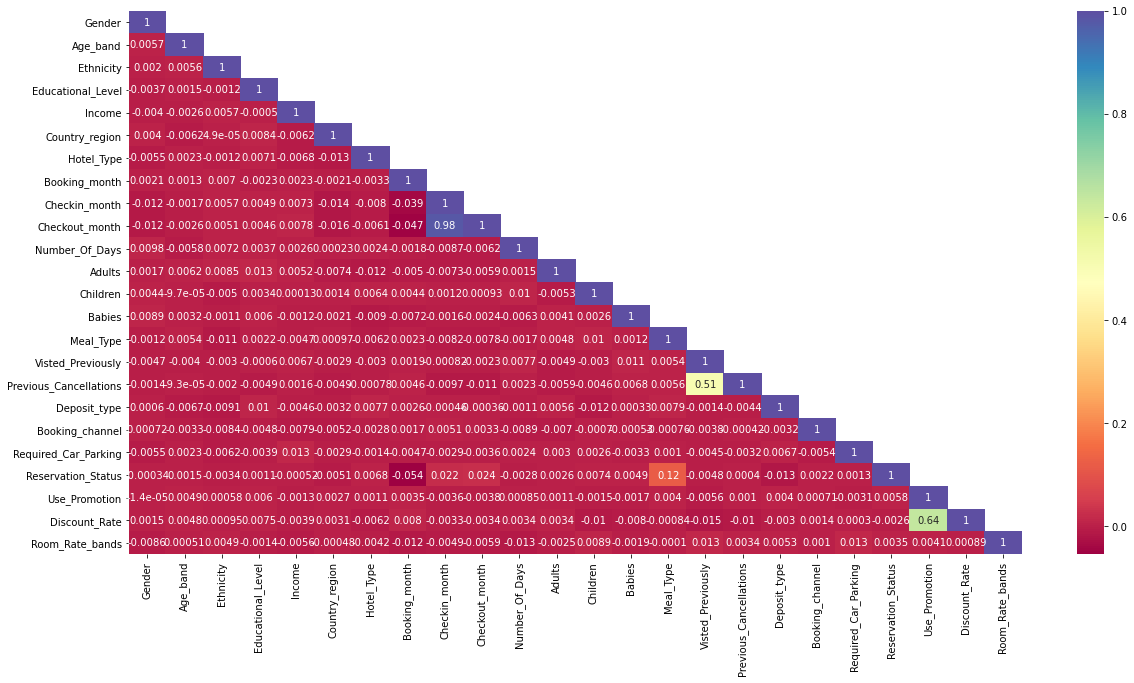

['Checkout_month', 'Previous_Cancellations', 'Discount_Rate']


In [1004]:
data_new = data.drop(labels=['Reservation-id'],axis=1)

corr_mat = data_new.corr()
np.tril(np.ones(corr_mat.shape)).astype(np.bool)[0:5,0:5]

df_lt = corr_mat.where(np.tril(np.ones(corr_mat.shape)).astype(np.bool))

plt.subplots(figsize=(20,10))
sns.heatmap(df_lt, annot=True, cmap="Spectral", fmt='.2g')
plt.show()

corr_matrix = data_new.corr().abs()
lower = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in lower.columns if any(lower[column] > 0.5)]

print(to_drop)

In [1005]:
data['Reservation_Status'].value_counts()

1    22848
2     4875
3     2521
Name: Reservation_Status, dtype: int64

In [1006]:
# Shuffle the Dataset.
shuffled_df = data.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
class_2 = shuffled_df.loc[shuffled_df['Reservation_Status'] == 2]

class_3 = shuffled_df.loc[shuffled_df['Reservation_Status'] == 3]

# #Randomly select 492 observations from the non-fraud (majority class)
class_1 =shuffled_df.loc[shuffled_df['Reservation_Status'] == 1].sample(n=8000,random_state=42)

# # Concatenate both dataframes again
new_data = pd.concat([class_2, class_1,class_3])

new_data.shape
new_data = new_data.sample(frac=1,random_state=4)

In [1007]:
new_data['Reservation_Status'].value_counts()

1    8000
2    4875
3    2521
Name: Reservation_Status, dtype: int64

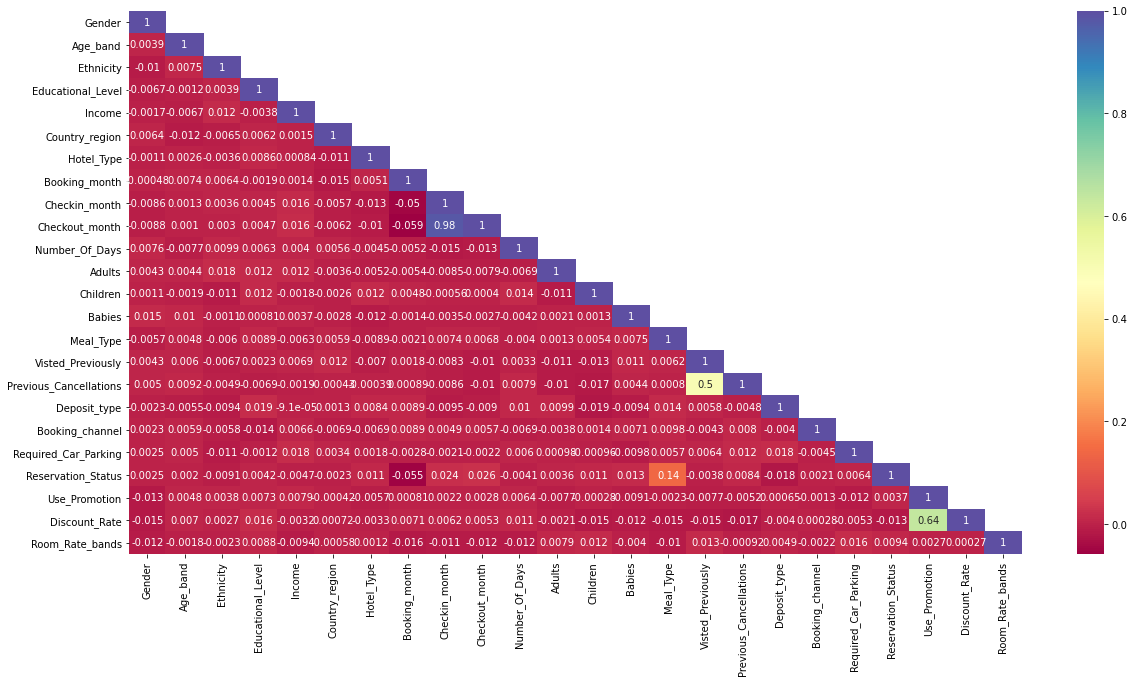

['Checkout_month', 'Previous_Cancellations', 'Discount_Rate']


In [1008]:
data_new = new_data.drop(labels=['Reservation-id'],axis=1)

corr_mat = data_new.corr()
np.tril(np.ones(corr_mat.shape)).astype(np.bool)[0:5,0:5]

df_lt = corr_mat.where(np.tril(np.ones(corr_mat.shape)).astype(np.bool))

plt.subplots(figsize=(20,10))
sns.heatmap(df_lt, annot=True, cmap="Spectral", fmt='.2g')
plt.show()

corr_matrix = data_new.corr().abs()
lower = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in lower.columns if any(lower[column] > 0.5)]

print(to_drop)

In [1009]:
new_data.drop(labels=['Checkout_month', 'Discount_Rate'],axis=1, inplace=True)
data.drop(labels=['Checkout_month', 'Discount_Rate'],axis=1, inplace=True)

test.drop(labels=['Checkout_month', 'Discount_Rate'],axis=1, inplace=True)

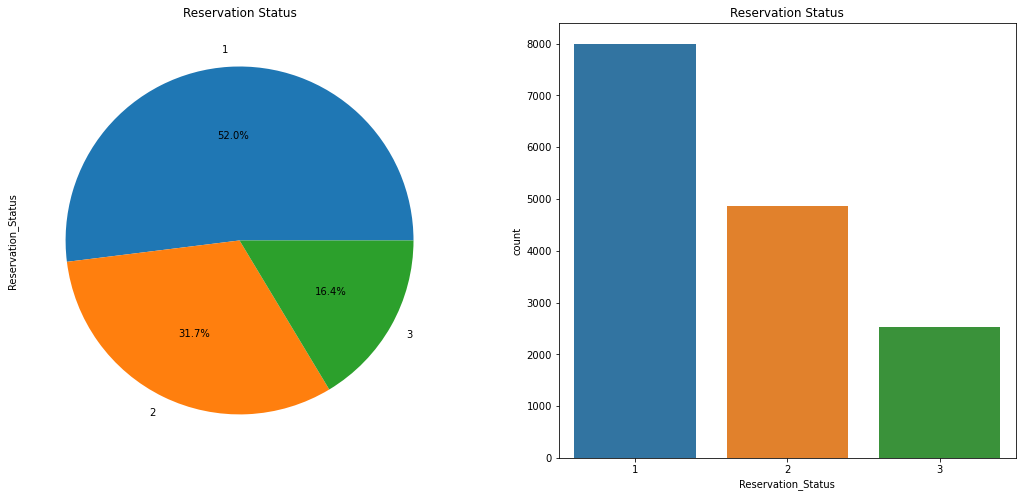

In [1010]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
new_data['Reservation_Status'].value_counts().plot.pie(explode=None,autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Reservation Status')
sns.countplot('Reservation_Status',data=new_data,ax=ax[1])
ax[1].set_title('Reservation Status')
plt.show()

In [1011]:
y = new_data['Reservation_Status']
Y = data['Reservation_Status']

new_data.drop(["Reservation_Status"], axis=1, inplace=True)
data.drop(["Reservation_Status"], axis=1, inplace=True)

In [1012]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.svm import SVC, LinearSVC
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.linear_model import SGDClassifier


In [1013]:
X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size=.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [1014]:
x_train, x_test, Y_train, Y_test = train_test_split(data, Y, test_size=.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [1015]:
import warnings
warnings.filterwarnings('ignore') 

In [1016]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

classifiers = [
    LogisticRegression(),
    linear_model.SGDClassifier(max_iter=5, tol=None),
    KNeighborsClassifier(5),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(n_estimators=500),
    DecisionTreeClassifier(),
    XGBClassifier(random_state=42, n_jobs=-1)
    ]

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print(classifier)
    y_pred = pipe.predict(X_test)
    print("Macro F1 score : ", f1_score(y_test, y_pred, average='macro'))
    print("")

LogisticRegression()
Macro F1 score :  0.2720081186732665

SGDClassifier(max_iter=5, tol=None)
Macro F1 score :  0.3091038790643615

KNeighborsClassifier()
Macro F1 score :  0.33625568292473157

AdaBoostClassifier()
Macro F1 score :  0.33755937464135394

GradientBoostingClassifier()
Macro F1 score :  0.3415141770491434

RandomForestClassifier(n_estimators=500)
Macro F1 score :  0.3304563429113589

DecisionTreeClassifier()
Macro F1 score :  0.36602816472403016

[18:05:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
 

In [1017]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

classifiers = [
    LogisticRegression(),
    linear_model.SGDClassifier(max_iter=5, tol=None),
    KNeighborsClassifier(5),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(n_estimators=500),
    DecisionTreeClassifier(),
    XGBClassifier(random_state=42, n_jobs=-1)
    ]

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(x_train, Y_train)   
    print(classifier)
    Y_pred = pipe.predict(x_test)
    print("Macro F1 score : ", f1_score(Y_test, Y_pred, average='macro'))
    print("")

LogisticRegression()
Macro F1 score :  0.2874071287501176

SGDClassifier(max_iter=5, tol=None)
Macro F1 score :  0.2874071287501176

KNeighborsClassifier()
Macro F1 score :  0.30002205380892955

AdaBoostClassifier()
Macro F1 score :  0.2874071287501176

GradientBoostingClassifier()
Macro F1 score :  0.2873898453915389

RandomForestClassifier(n_estimators=500)
Macro F1 score :  0.2874071287501176

DecisionTreeClassifier()
Macro F1 score :  0.340919430402357

[18:06:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
    

In [1018]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

Y_prediction = DT.predict(X_test)

f1_score(y_test, Y_prediction, average='macro')

0.3642349308858724

In [1019]:
Test_copy = test.copy()

#Train the model using the complete training set using the model parameters defined above

#predicting values for test set
y_pred = DT.predict(Test_copy)

#Create a  DataFrame with the client ids and our prediction 
submission = pd.DataFrame({'Reservation-id':test['Reservation-id'],'Reservation_Status':y_pred})

#Convert DataFrame to a csv file that can be uploaded
filename = 'DataStorm Predictions 1.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: DataStorm Predictions 1.csv


In [1020]:
submission['Reservation_Status'].value_counts()

1    2719
2    1377
3     222
Name: Reservation_Status, dtype: int64